## Import Statements

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

c:\Users\jslon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Functions

In [2]:
def GetReading(filename: str):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,8)),encoding='latin-1')
    vals = df['Reading'].values
    return vals
  except:
    print(f'Error reading {filename}')

In [3]:
#Same as old meter setup, but with 20dBm in attenuated by 10dB, no amplifying, det646
def LoopMeterRead(ver: str):
  valsarray = []
  metervals = ['0000','0100','0200','0300','0400','0500','0600','0700','0800','0900']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

def LoopMeterReadv2(ver: str):
  valsarray = []
  metervals = ['0000','0050','0100','0150','0200','0250','0300','0350','0400','0450','0500','0550','0600','0650','0700','0750','0800','0850','0900','0950','1000']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

def LoopMeterReadv3(ver: str):
  valsarray = []
  metervals = ['0000','0025','0050','0075','0100','0125','0150','0175','0200','0225','0250','0275','0300','0325','0350','0375','0400','0425','0450','0475','0500','0525','0550','0575','0600','0625','0650','0675','0700','0725','0750','0775','0800','0825','0850','0875','0900','0925','0950','0975','1000']
  for meter in metervals:
    S1 = r"Meterval"
    S3 = ".csv"
    filename = S1 + meter + ver + S3
    vals = GetReading(filename)
    valsarray.append(vals)
  return valsarray

## QH Data Cont, Scaling and mw

This is the same mean plot/data present in the previous week to refer to

In [4]:
metervals = np.arange(0,1000,100)
metervalsv2 = np.arange(0,1050,50)
metervalsv3 = np.arange(0,1025,25)

In [5]:
#v7 - 646
metervalsarray7 = LoopMeterReadv3('v7')

metermeanvals7 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray7])
meterstdvals7 = np.array([np.abs(np.std(val)) for val in metervalsarray7])
meterstdpvals7 = 100*meterstdvals7/metermeanvals7

#v8 - 647
metervalsarray8 = LoopMeterReadv3('v8')

metermeanvals8 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray8])
meterstdvals8 = np.array([np.abs(np.std(val)) for val in metervalsarray8])
meterstdpvals8 = 100*meterstdvals8/metermeanvals8

#v9 - 648
metervalsarray9 = LoopMeterReadv3('v9')

metermeanvals9 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray9])
meterstdvals9 = np.array([np.abs(np.std(val)) for val in metervalsarray9])
meterstdpvals9 = 100*meterstdvals9/metermeanvals9

#v10 - 645
metervalsarray10 = LoopMeterReadv3('v10')

metermeanvals10 = np.array([np.abs(np.mean(vals)) for vals in metervalsarray10])
meterstdvals10 = np.array([np.abs(np.std(val)) for val in metervalsarray10])
meterstdpvals10 = 100*meterstdvals10/metermeanvals10

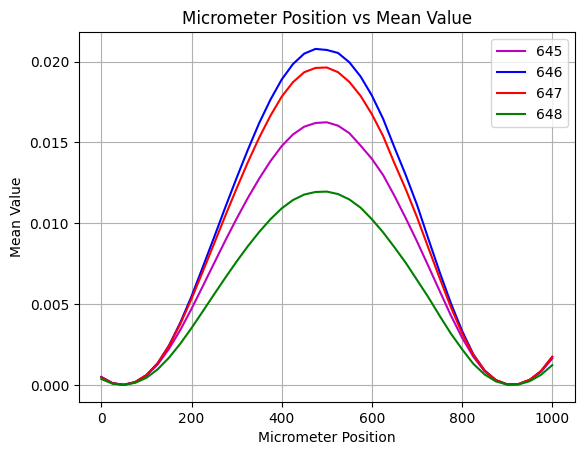

In [6]:
plt.plot(metervalsv3,metermeanvals10,'-m',label='645')
plt.plot(metervalsv3,metermeanvals7,'-b',label='646')
plt.plot(metervalsv3,metermeanvals8,'-r',label='647')
plt.plot(metervalsv3,metermeanvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Mean Value')
plt.title('Micrometer Position vs Mean Value')
plt.legend()
plt.grid()

This is an attempt to linearly scale the curves to match each other, the scaling values were found algorithmically seperately

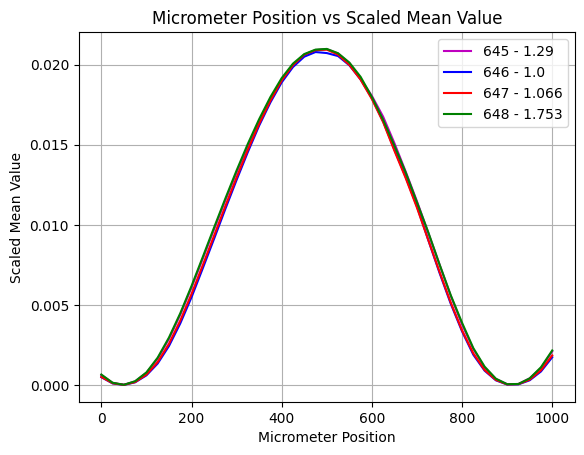

In [7]:
scalingvals = [1.290,1.000,1.066,1.753]

plt.plot(metervalsv3,metermeanvals10*scalingvals[0],'-m',label=f'645 - {scalingvals[0]}')
plt.plot(metervalsv3,metermeanvals7*scalingvals[1],'-b',label=f'646 - {scalingvals[1]}')
plt.plot(metervalsv3,metermeanvals8*scalingvals[2],'-r',label=f'647 - {scalingvals[2]}')
plt.plot(metervalsv3,metermeanvals9*scalingvals[3],'-g',label=f'648 - {scalingvals[3]}')

plt.xlabel('Micrometer Position')
plt.ylabel('Scaled Mean Value')
plt.title('Micrometer Position vs Scaled Mean Value')
plt.legend()
plt.grid()

this is the mw dBm relation

In [8]:
mwfunc = lambda x: 1000*10**(1000*x/10)

This convers the mean data to mw

In [9]:
mwmeanvals7 = mwfunc(metermeanvals7)
mwmeanvals8 = mwfunc(metermeanvals8)
mwmeanvals9 = mwfunc(metermeanvals9)
mwmeanvals10 = mwfunc(metermeanvals10)

This is the plot of the mean value in mw, converting from the voltage values naively

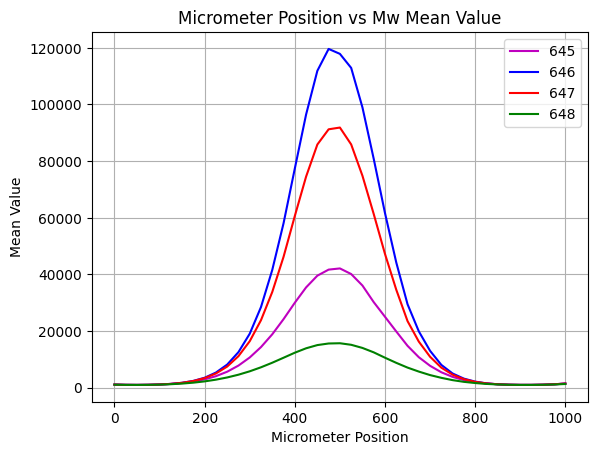

In [10]:
plt.plot(metervalsv3,mwmeanvals10,'-m',label='645')
plt.plot(metervalsv3,mwmeanvals7,'-b',label='646')
plt.plot(metervalsv3,mwmeanvals8,'-r',label='647')
plt.plot(metervalsv3,mwmeanvals9,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Mean Value')
plt.title('Micrometer Position vs Mw Mean Value')
plt.legend()
plt.grid()

This plot is shows the scalar relations between the above curves

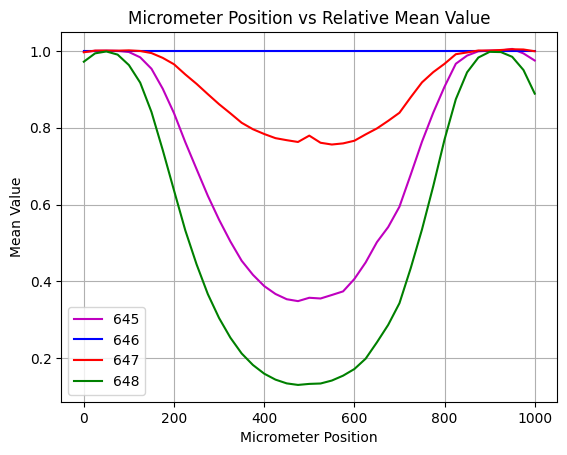

In [11]:
plt.plot(metervalsv3,mwmeanvals10/mwmeanvals7,'-m',label='645')
plt.plot(metervalsv3,mwmeanvals7/mwmeanvals7,'-b',label='646')
plt.plot(metervalsv3,mwmeanvals8/mwmeanvals7,'-r',label='647')
plt.plot(metervalsv3,mwmeanvals9/mwmeanvals7,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Mean Value')
plt.title('Micrometer Position vs Relative Mean Value')
plt.legend()
plt.grid()

## QH Data, Linear Fits

This plot shows the relationships between the detectors power curves, useful for trying to translate readings between them

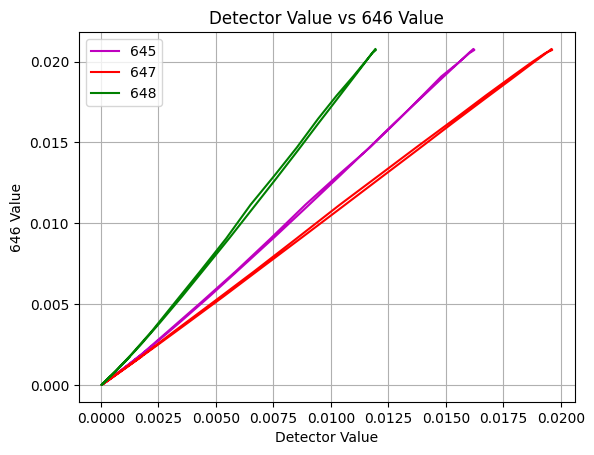

In [12]:
plt.plot(metermeanvals10,metermeanvals7,'-m',label='645')
plt.plot(metermeanvals8,metermeanvals7,'-r',label='647')
plt.plot(metermeanvals9,metermeanvals7,'-g',label='648')

plt.xlabel('Detector Value')
plt.ylabel('646 Value')
plt.title('Detector Value vs 646 Value')
plt.legend()
plt.grid()

This does the same, but with the 'mw' values

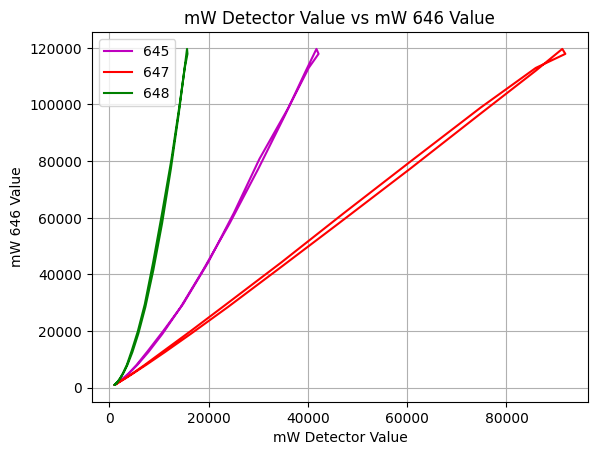

In [13]:
plt.plot(mwmeanvals10,mwmeanvals7,'-m',label='645')
plt.plot(mwmeanvals8,mwmeanvals7,'-r',label='647')
plt.plot(mwmeanvals9,mwmeanvals7,'-g',label='648')

plt.xlabel('mW Detector Value')
plt.ylabel('mW 646 Value')
plt.title('mW Detector Value vs mW 646 Value')
plt.legend()
plt.grid()

Graphical analysis was used to fit the above lines (2plots above)

In [16]:
lfunc645 = lambda x: 1.29*x -0.0002719
lfunc647 = lambda x: 1.066*x - 0.00006203
lfunc648 = lambda x: 1.753*x - 0.0003098

In [17]:
ltransf645 = lfunc645(metermeanvals10)
ltransf647 = lfunc647(metermeanvals8)
ltransf648 = lfunc648(metermeanvals9)
ltransf646 = metermeanvals7

This plot compares the fit of the 645 vs 646 data to the raw data

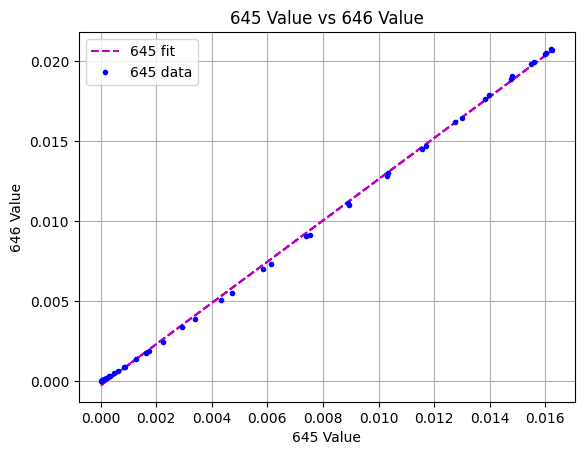

In [18]:
plt.plot(metermeanvals10,ltransf645,'--m',label='645 fit')
plt.plot(metermeanvals10,metermeanvals7,'ob',markersize=3,label='645 data')

plt.xlabel('645 Value')
plt.ylabel('646 Value')
plt.title('645 Value vs 646 Value')
plt.legend()
plt.grid()

This plot compares the fit of the 647 vs 646 data to the raw data

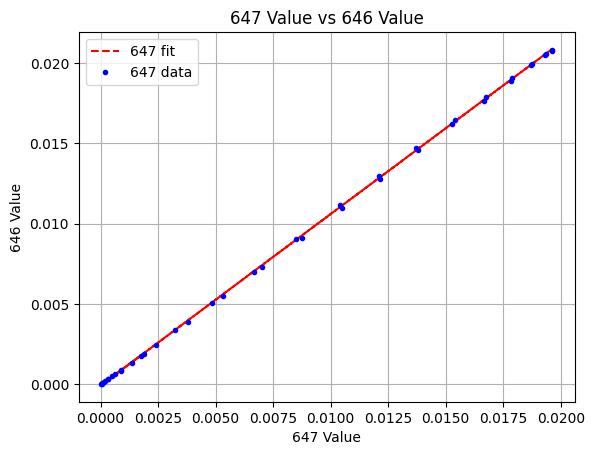

In [19]:
plt.plot(metermeanvals8,ltransf647,'--r',label='647 fit')
plt.plot(metermeanvals8,metermeanvals7,'ob',markersize=3,label='647 data')

plt.xlabel('647 Value')
plt.ylabel('646 Value')
plt.title('647 Value vs 646 Value')
plt.legend()
plt.grid()

This plot compares the fit of the 648 vs 646 data to the raw data

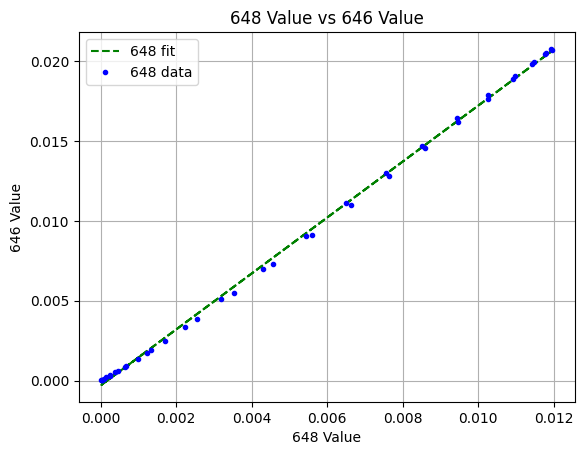

In [20]:
plt.plot(metermeanvals9,ltransf648,'--g',label='648 fit')
plt.plot(metermeanvals9,metermeanvals7,'ob',markersize=3,label='648 data')

plt.xlabel('648 Value')
plt.ylabel('646 Value')
plt.title('648 Value vs 646 Value')
plt.legend()
plt.grid()

This plot uses the linear transformations found to scale the curves to match each other

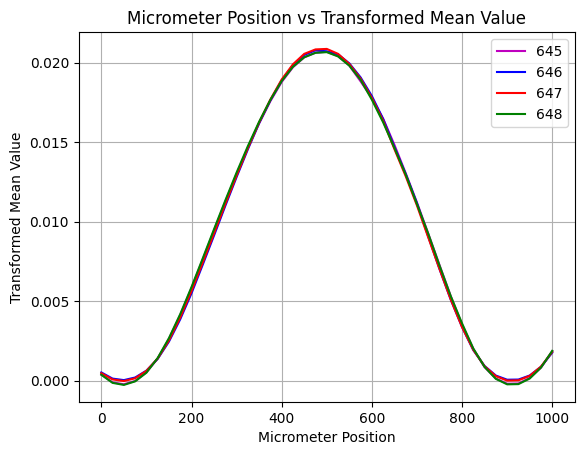

In [21]:
plt.plot(metervalsv3,ltransf645,'-m',label='645')
plt.plot(metervalsv3,ltransf646,'-b',label='646')
plt.plot(metervalsv3,ltransf647,'-r',label='647')
plt.plot(metervalsv3,ltransf648,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Transformed Mean Value')
plt.title('Micrometer Position vs Transformed Mean Value')
plt.legend()
plt.grid()

This cell and plot show the error between the curves above

In [22]:
errorlt = lambda x: np.abs((ltransf646 - x)/x)

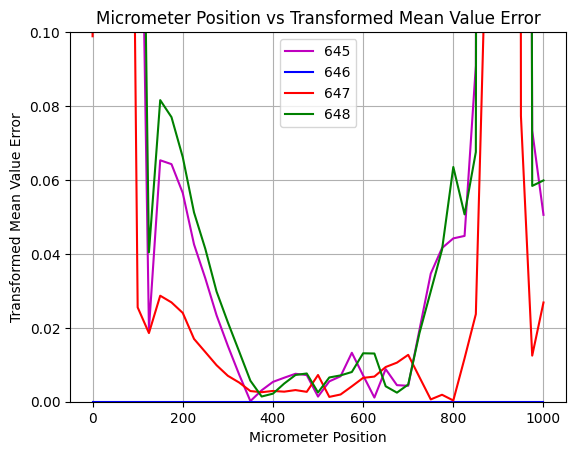

In [23]:
plt.plot(metervalsv3,errorlt(ltransf645),'-m',label='645')
plt.plot(metervalsv3,errorlt(ltransf646),'-b',label='646')
plt.plot(metervalsv3,errorlt(ltransf647),'-r',label='647')
plt.plot(metervalsv3,errorlt(ltransf648),'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Transformed Mean Value Error')
plt.title('Micrometer Position vs Transformed Mean Value Error')
plt.ylim(0,0.1)
plt.legend()
plt.grid()

## QH Data, Exponential Fits

In [24]:
#Exponential Fits

This is the same as above, but with exponential fits

In [25]:
efunc645 = lambda x: 0.116*np.exp(10.25*x) - 0.1162
efunc647 = lambda x: -17.18*np.exp(-0.062*x) + 17.18
efunc648 = lambda x: 0.1114*np.exp(14.46*x) - 0.1115

In [26]:
etransf645 = efunc645(metermeanvals10)
etransf647 = efunc647(metermeanvals8)
etransf648 = efunc648(metermeanvals9)
etransf646 = metermeanvals7

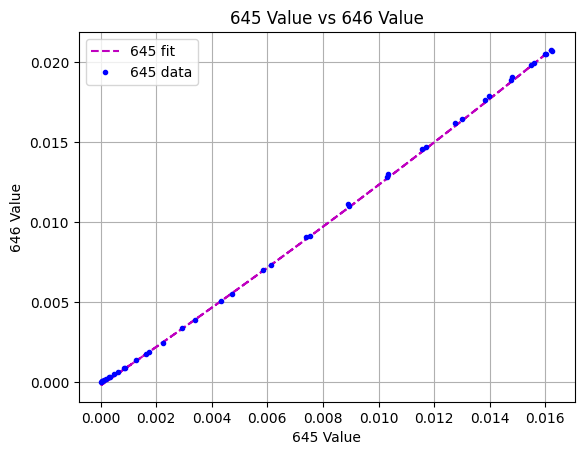

In [27]:
plt.plot(metermeanvals10,etransf645,'--m',label='645 fit')
plt.plot(metermeanvals10,metermeanvals7,'ob',markersize=3,label='645 data')

plt.xlabel('645 Value')
plt.ylabel('646 Value')
plt.title('645 Value vs 646 Value')
plt.legend()
plt.grid()

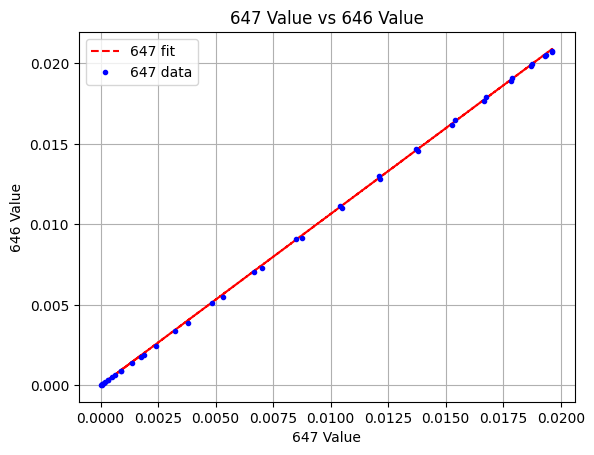

In [28]:
plt.plot(metermeanvals8,etransf647,'--r',label='647 fit')
plt.plot(metermeanvals8,metermeanvals7,'ob',markersize=3,label='647 data')

plt.xlabel('647 Value')
plt.ylabel('646 Value')
plt.title('647 Value vs 646 Value')
plt.legend()
plt.grid()

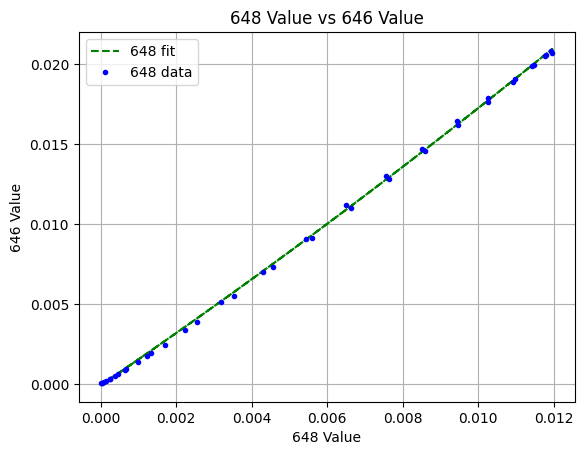

In [29]:
plt.plot(metermeanvals9,etransf648,'--g',label='648 fit')
plt.plot(metermeanvals9,metermeanvals7,'ob',markersize=3,label='648 data')

plt.xlabel('648 Value')
plt.ylabel('646 Value')
plt.title('648 Value vs 646 Value')
plt.legend()
plt.grid()

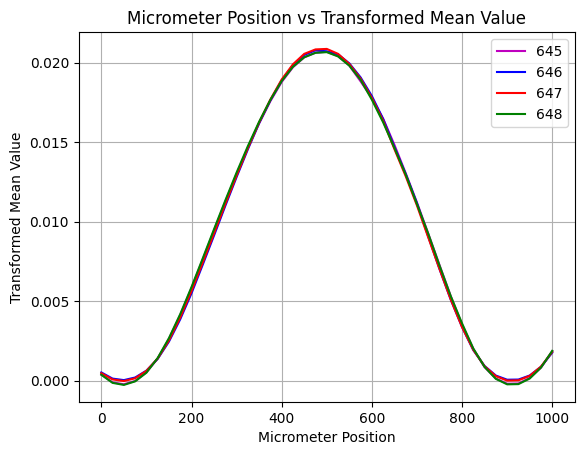

In [30]:
plt.plot(metervalsv3,ltransf645,'-m',label='645')
plt.plot(metervalsv3,ltransf646,'-b',label='646')
plt.plot(metervalsv3,ltransf647,'-r',label='647')
plt.plot(metervalsv3,ltransf648,'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Transformed Mean Value')
plt.title('Micrometer Position vs Transformed Mean Value')
plt.legend()
plt.grid()

In [31]:
erroret = lambda x: np.abs((etransf646 - x)/x)

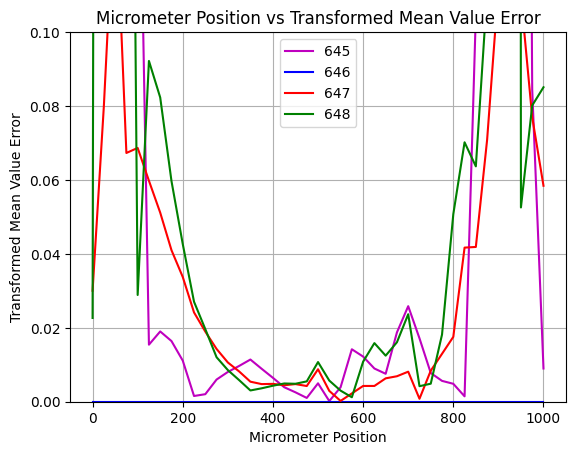

In [32]:
plt.plot(metervalsv3,erroret(etransf645),'-m',label='645')
plt.plot(metervalsv3,erroret(etransf646),'-b',label='646')
plt.plot(metervalsv3,erroret(etransf647),'-r',label='647')
plt.plot(metervalsv3,erroret(etransf648),'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Transformed Mean Value Error')
plt.title('Micrometer Position vs Transformed Mean Value Error')
plt.ylim(0,0.1)
plt.legend()
plt.grid()

## QH Data, Sinusoidal Fits

In [33]:
#Sinusoidal Fits

Same as above, but with sinusoidal fits

In [34]:
sfunc645 = lambda x: 0.02263*np.sin(59.78*x + 5.633) + 0.01367
sfunc647 = lambda x: 0.02852*np.sin(38.03*x + 5.907) + 0.01046
sfunc648 = lambda x: 0.02015*np.sin(91.86*x + 5.583) + 0.01295

In [35]:
stransf645 = sfunc645(metermeanvals10)
stransf647 = sfunc647(metermeanvals8)
stransf648 = sfunc648(metermeanvals9)
stransf646 = metermeanvals7

In [36]:
errorst = lambda x: np.abs((stransf646 - x)/x)

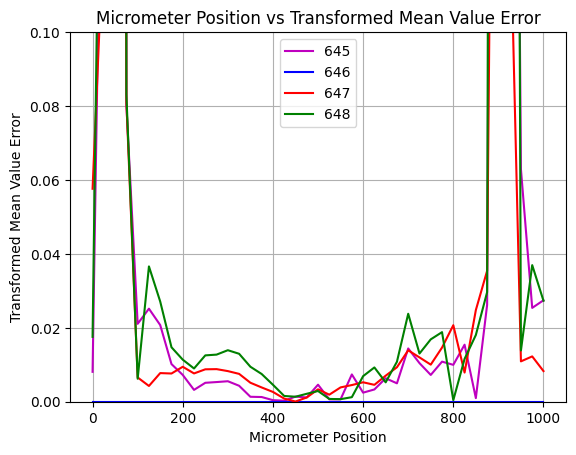

In [37]:
plt.plot(metervalsv3,errorst(stransf645),'-m',label='645')
plt.plot(metervalsv3,errorst(stransf646),'-b',label='646')
plt.plot(metervalsv3,errorst(stransf647),'-r',label='647')
plt.plot(metervalsv3,errorst(stransf648),'-g',label='648')

plt.xlabel('Micrometer Position')
plt.ylabel('Transformed Mean Value Error')
plt.title('Micrometer Position vs Transformed Mean Value Error')
plt.ylim(0,0.1)
plt.legend()
plt.grid()

## QH Data, Comparing Fits

In [38]:
#Comparing Fits

This plot shows the error for detector 645 for all fits

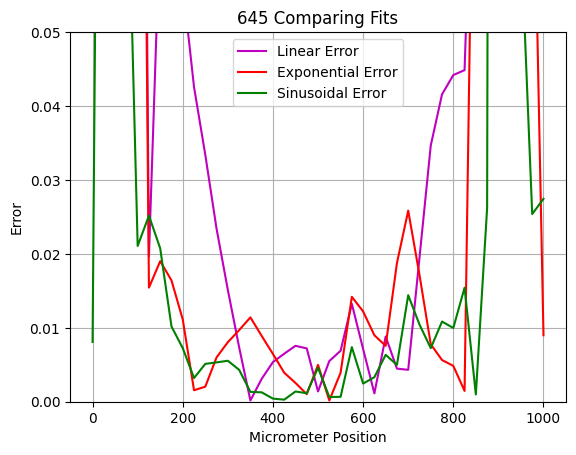

In [39]:
plt.plot(metervalsv3,errorlt(ltransf645),'-m',markersize=3,label='Linear Error')
plt.plot(metervalsv3,erroret(etransf645),'-r',markersize=3,label='Exponential Error')
plt.plot(metervalsv3,errorst(stransf645),'-g',markersize=3,label='Sinusoidal Error')

plt.xlabel('Micrometer Position')
plt.ylabel('Error')
plt.title('645 Comparing Fits')
plt.ylim(0,0.05)
plt.legend()
plt.grid()

This plot shows the error for detector 647 for all fits

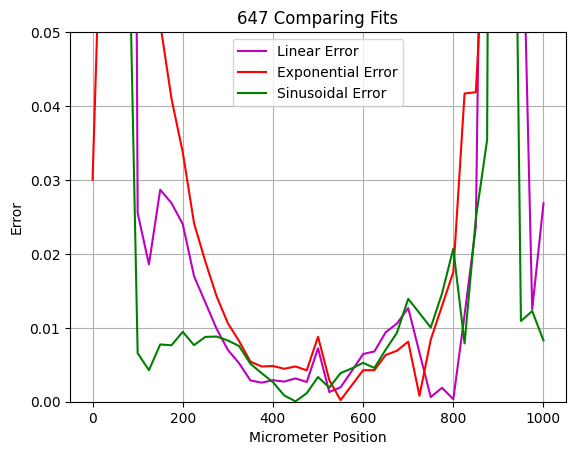

In [40]:
plt.plot(metervalsv3,errorlt(ltransf647),'-m',markersize=3,label='Linear Error')
plt.plot(metervalsv3,erroret(etransf647),'-r',markersize=3,label='Exponential Error')
plt.plot(metervalsv3,errorst(stransf647),'-g',markersize=3,label='Sinusoidal Error')

plt.xlabel('Micrometer Position')
plt.ylabel('Error')
plt.title('647 Comparing Fits')
plt.ylim(0,0.05)
plt.legend()
plt.grid()

This plot shows the error for detector 648 for all fits

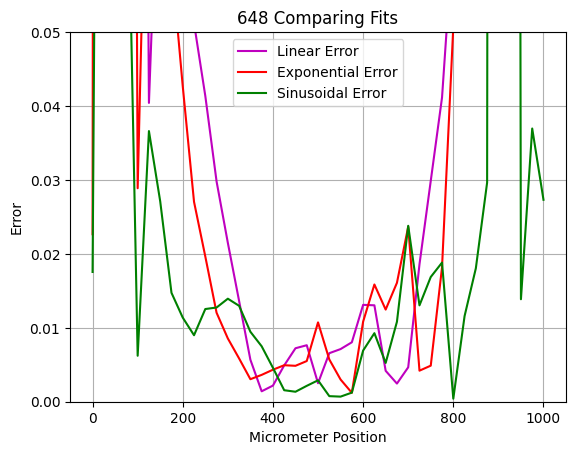

In [41]:
plt.plot(metervalsv3,errorlt(ltransf648),'-m',markersize=3,label='Linear Error')
plt.plot(metervalsv3,erroret(etransf648),'-r',markersize=3,label='Exponential Error')
plt.plot(metervalsv3,errorst(stransf648),'-g',markersize=3,label='Sinusoidal Error')

plt.xlabel('Micrometer Position')
plt.ylabel('Error')
plt.title('648 Comparing Fits')
plt.ylim(0,0.05)
plt.legend()
plt.grid()

Sinusoidal fits are likely the best to match one detector to another

This plot shows the linear relations with the 646 detector again

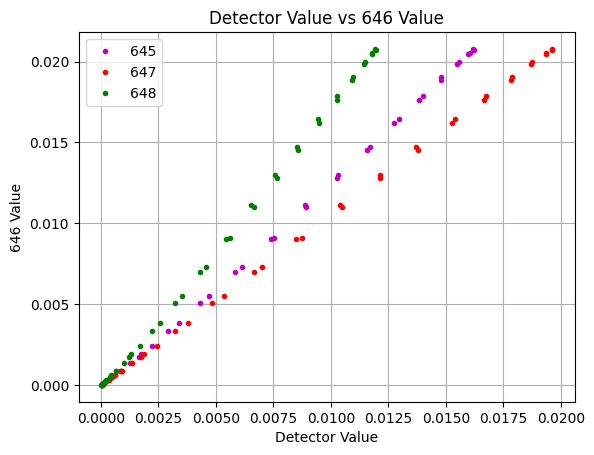

In [42]:
plt.plot(metermeanvals10,metermeanvals7,'om',markersize=3,label='645')
plt.plot(metermeanvals8,metermeanvals7,'or',markersize=3,label='647')
plt.plot(metermeanvals9,metermeanvals7,'og',markersize=3,label='648')

plt.xlabel('Detector Value')
plt.ylabel('646 Value')
plt.title('Detector Value vs 646 Value')
plt.legend()
plt.grid()

Misc Utility

Index: [19, 20, 21]
Meter Position: [475 500 525]


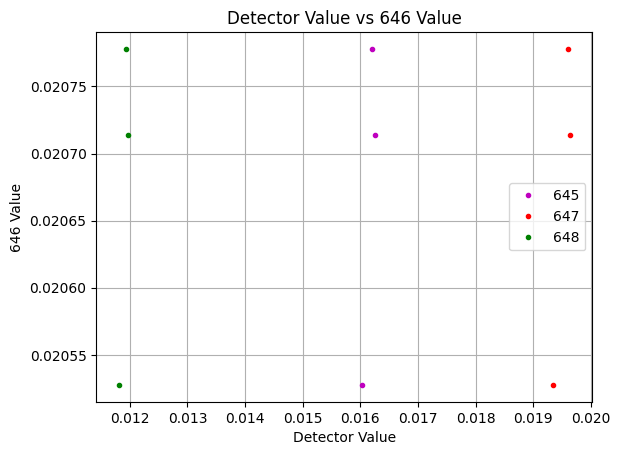

In [43]:
#can be from 0-40
index = [19,20,21]
print(f'Index: {index}')
print(f'Meter Position: {metervalsv3[index]}')

plt.plot(metermeanvals10[index],metermeanvals7[index],'om',markersize=3,label='645')
plt.plot(metermeanvals8[index],metermeanvals7[index],'or',markersize=3,label='647')
plt.plot(metermeanvals9[index],metermeanvals7[index],'og',markersize=3,label='648')

plt.xlabel('Detector Value')
plt.ylabel('646 Value')
plt.title('Detector Value vs 646 Value')
plt.legend()
plt.grid()

## DMM Synching, Raw Data

In [44]:
#keysight wait time less than 10us


In [45]:
#Micro 0 - 1000,
#keysight quad 2-2 det 647

In [46]:
def GetKeithly(filename):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,8)),encoding='latin-1')
    vals = df['Reading'].values
    return vals
  except:
    print(f'Error reading {filename}')

def GetKeysight(filename):
  try:
    df = pd.read_csv(filename, skiprows=list(range(0,1)),encoding='latin-1')
    vals = df['Reading'].values
    return vals
  except:
    print(f'Error reading {filename}')

In [47]:
End_Index = 3750

In [48]:
KeithlyTest1vals = GetKeithly('KeithlyTest1.csv')[:End_Index]
KeysightTest1vals = GetKeysight('KeysightTest1.csv')[:End_Index]

#KeithlyTest1vals = KeithlyTest1vals[KeithlyTest1vals < 1e10]
#KeysightTest1vals = KeysightTest1vals[KeysightTest1vals < 1e10]

In [49]:
Keithly_Len = len(KeithlyTest1vals)
Keysight_Len = len(KeysightTest1vals)

print(Keithly_Len)
print(Keysight_Len)

3750
3750


In [50]:
Keithlyxvals = list(range(Keithly_Len))
Keysightxvals = list(range(Keysight_Len))

Each dmm is plugged into one output slot of the QH as the relative phase is cycled

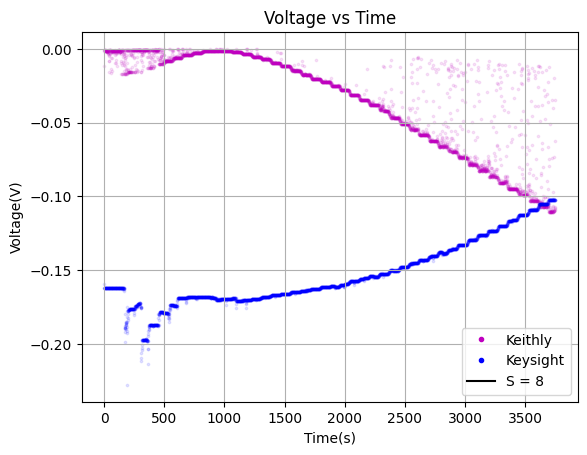

In [51]:
KeysightScale = 8#1.066

plt.scatter(Keithlyxvals,KeithlyTest1vals,s=3,c='m',alpha=0.1)
plt.scatter(Keysightxvals,KeysightTest1vals*KeysightScale,s=3,c='b',alpha=0.1)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')
plt.plot([],[],'-k',label=f'S = {KeysightScale}')

plt.xlabel('Time(s)')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Time')
plt.legend()
plt.grid()

This shows the total power of both outputs

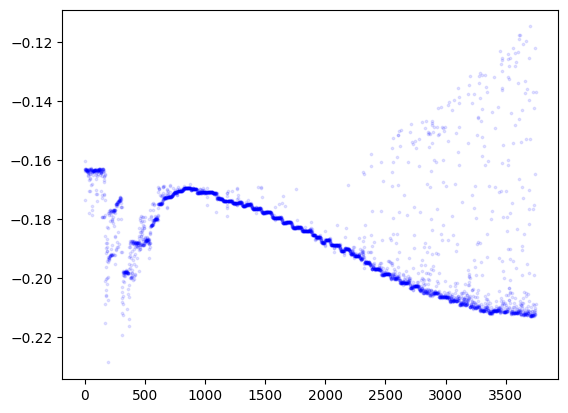

In [52]:
plt.scatter(Keithlyxvals,KeysightTest1vals*KeysightScale+KeithlyTest1vals,s=3,c='b',alpha=0.1)

This data is from plugging a signal from a function generator into both DMMs and using the trigger output from one to trigger the other. This setup is to quantify the delay present and to synch up the signals

In [54]:
Keith0 = GetKeithly('Data_0a.csv')
Keith1 = GetKeithly('Data_1a.csv')
Keith2 = GetKeithly('Data_2a.csv')
Keith3 = GetKeithly('Data_3a.csv')
Keith4 = GetKeithly('Data_4a.csv')
Keith5 = GetKeithly('Data_5a.csv')

Key0 = GetKeysight('DATA_0.csv')
Key1 = GetKeysight('DATA_1.csv')
Key2 = GetKeysight('DATA_2.csv')
Key3 = GetKeysight('DATA_3.csv')
Key4 = GetKeysight('DATA_4.csv')
Key5 = GetKeysight('DATA_5.csv')

KeithLen0 = len(Keith0)
KeithLen1 = len(Keith1)
KeithLen2 = len(Keith2)
KeithLen3 = len(Keith3)
KeithLen4 = len(Keith4)
KeithLen5 = len(Keith5)

KeyLen0 = len(Key0)
KeyLen1 = len(Key1)
KeyLen2 = len(Key2)
KeyLen3 = len(Key3)
KeyLen4 = len(Key4)
KeyLen5 = len(Key5)

xvals0 = np.array(list(range(KeithLen0))) if KeithLen0 == KeyLen0 else 'Error'
xvals1 = np.array(list(range(KeithLen1))) if KeithLen1 == KeyLen1 else 'Error'
xvals2 = np.array(list(range(KeithLen2))) if KeithLen2 == KeyLen2 else 'Error'
xvals3 = np.array(list(range(KeithLen3))) if KeithLen3 == KeyLen3 else 'Error'
xvals4 = np.array(list(range(KeithLen4))) if KeithLen4 == KeyLen4 else 'Error'
xvals5 = np.array(list(range(KeithLen5))) if KeithLen5 == KeyLen5 else 'Error'

In [55]:
print(len(xvals0))
print(len(xvals1))
print(len(xvals2))
print(len(xvals3))
print(len(xvals4))
print(len(xvals5))

10000
10000
10000
10000
5
5


In [56]:
#Analyze 0-Data

10hz sine wave, Sample at 1kHz, Amplitude 100mVpp

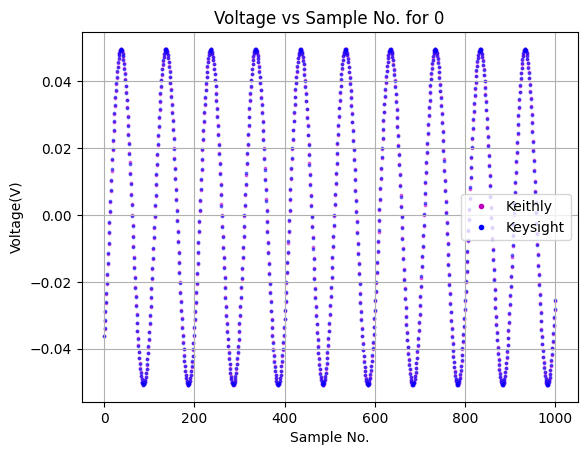

In [57]:
range0 = 1000

plt.scatter(xvals0[:range0],Keith0[:range0],s=3,c='m',alpha=0.5)
plt.scatter(xvals0[:range0],Key0[:range0],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 0')
plt.legend()
plt.grid()

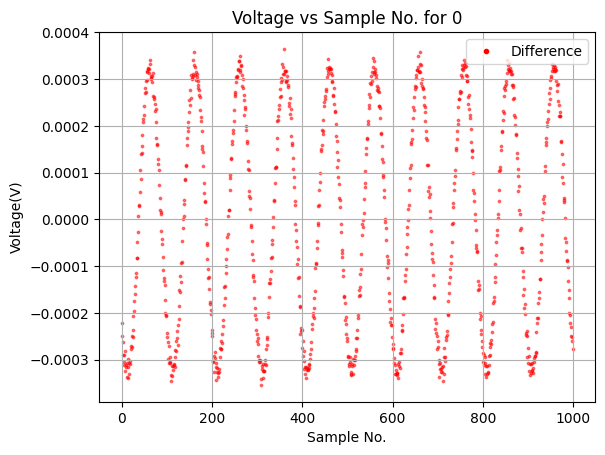

In [58]:
plt.scatter(xvals0[:range0],Keith0[:range0]-Key0[:range0],s=3,c='r',alpha=0.5)
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 0')
plt.legend()
plt.grid()

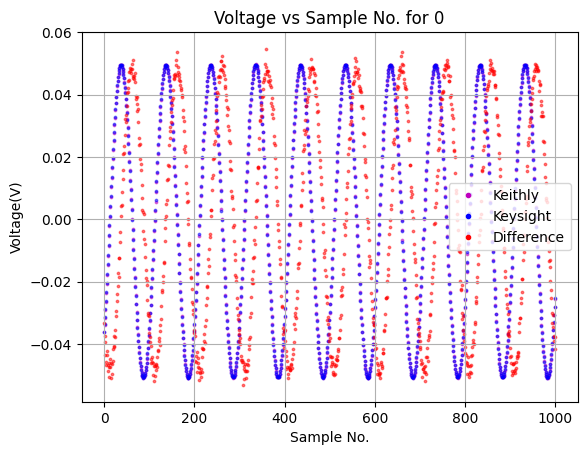

In [59]:
plt.scatter(xvals0[:range0],Keith0[:range0],s=3,c='m',alpha=0.5)
plt.scatter(xvals0[:range0],Key0[:range0],s=3,c='b',alpha=0.5)
plt.scatter(xvals0[:range0],150*(Keith0[:range0]-Key0[:range0]),s=3,c='r',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 0')
plt.legend()
plt.grid()

In [60]:
#Analyze 1-Data

10hz Triangle wave, Sample at 1kHz, Amplitude 100mVpp

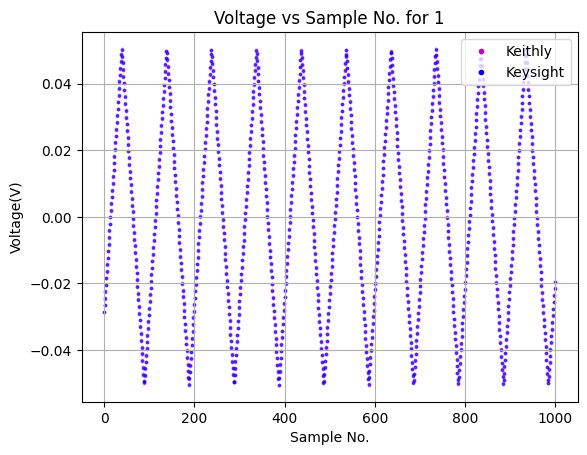

In [61]:
range1 = 1000

plt.scatter(xvals1[:range1],Keith1[:range1],s=3,c='m',alpha=0.5)
plt.scatter(xvals1[:range1],Key1[:range1],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 1')
plt.legend()
plt.grid()

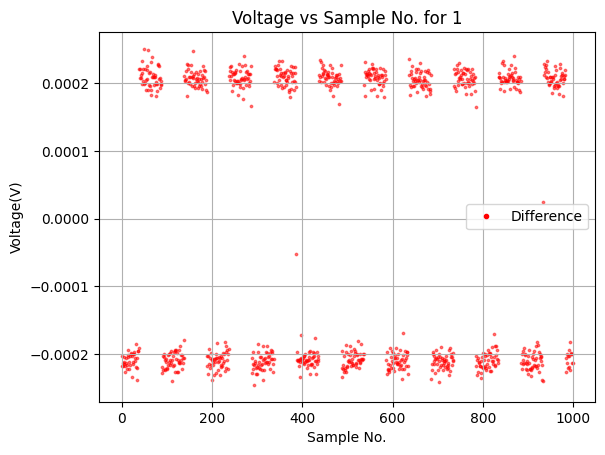

In [62]:
plt.scatter(xvals1[:range1],Keith1[:range1]-Key1[:range1],s=3,c='r',alpha=0.5)
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 1')
plt.legend()
plt.grid()

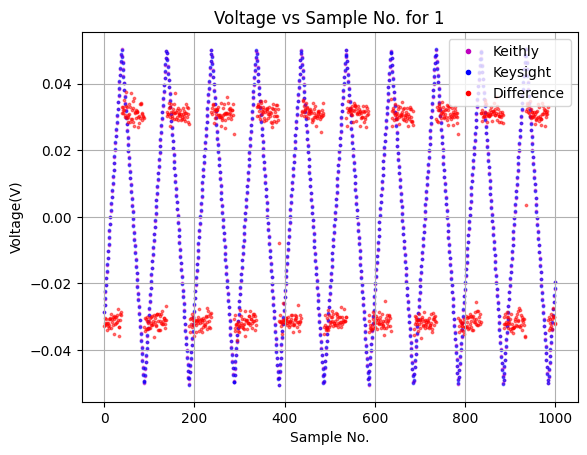

In [63]:
plt.scatter(xvals1[:range1],Keith1[:range1],s=3,c='m',alpha=0.5)
plt.scatter(xvals1[:range1],Key1[:range1],s=3,c='b',alpha=0.5)
plt.scatter(xvals1[:range1],150*(Keith1[:range1]-Key1[:range1]),s=3,c='r',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 1')
plt.legend()
plt.grid()

In [64]:
#Analyze 2-Data

100hz sine wave, Sample at 5kHz, Amplitude 10mVpp

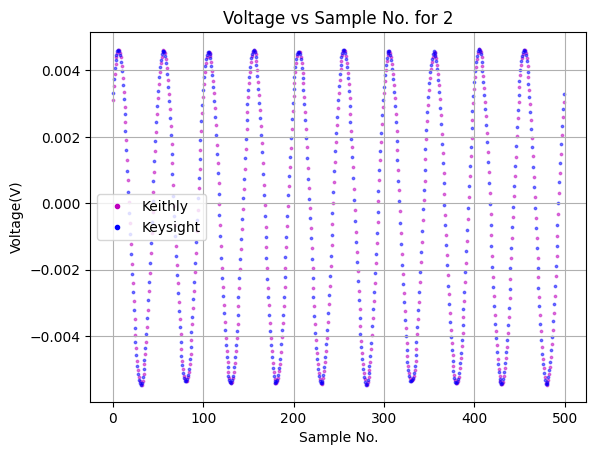

In [65]:
range2 = 500

plt.scatter(xvals2[:range2],Keith2[:range2],s=3,c='m',alpha=0.5)
plt.scatter(xvals2[:range2],Key2[:range2],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 2')
plt.legend()
plt.grid()

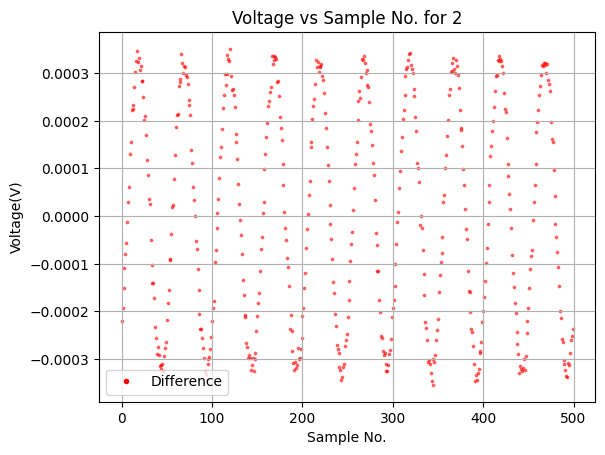

In [66]:
plt.scatter(xvals2[:range2],Keith2[:range2]-Key2[:range2],s=3,c='r',alpha=0.5)
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 2')
plt.legend()
plt.grid()

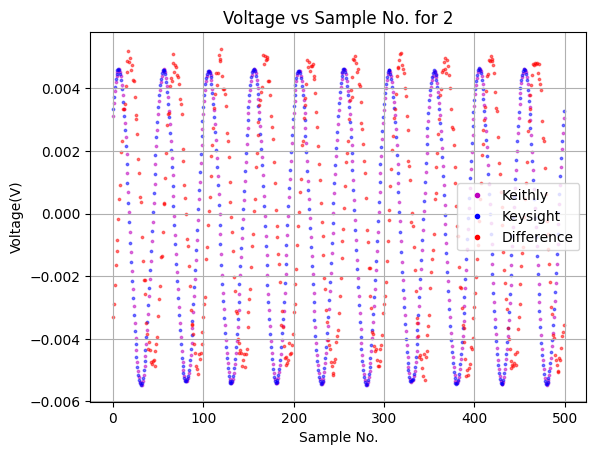

In [67]:
plt.scatter(xvals2[:range2],Keith2[:range2],s=3,c='m',alpha=0.5)
plt.scatter(xvals2[:range2],Key2[:range2],s=3,c='b',alpha=0.5)
plt.scatter(xvals2[:range2],15*(Keith2[:range2]-Key2[:range2]),s=3,c='r',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 2')
plt.legend()
plt.grid()

In [68]:
#Analyze 3-Data

100hz Triangle wave, Sample at 5kHz, Amplitude 10mVpp

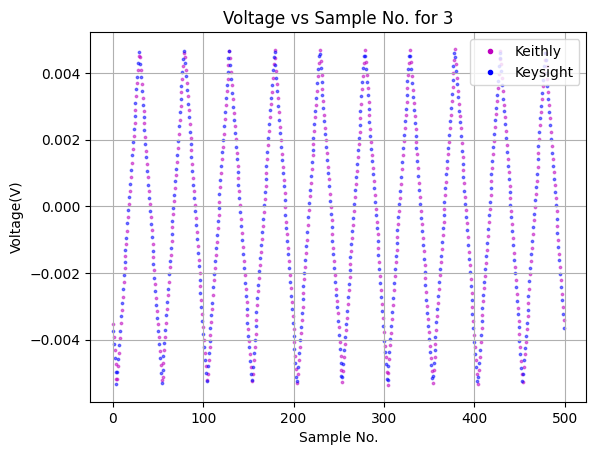

In [69]:
range3 = 500

plt.scatter(xvals3[:range3],Keith3[:range3],s=3,c='m',alpha=0.5)
plt.scatter(xvals3[:range3],Key3[:range3],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 3')
plt.legend()
plt.grid()

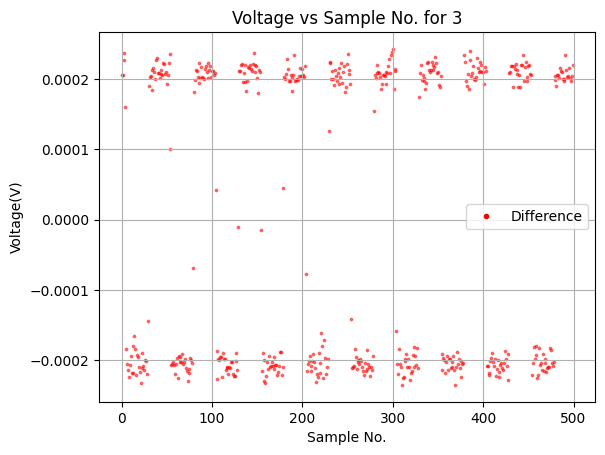

In [70]:
plt.scatter(xvals3[:range3],Keith3[:range3]-Key3[:range3],s=3,c='r',alpha=0.5)
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 3')
plt.legend()
plt.grid()

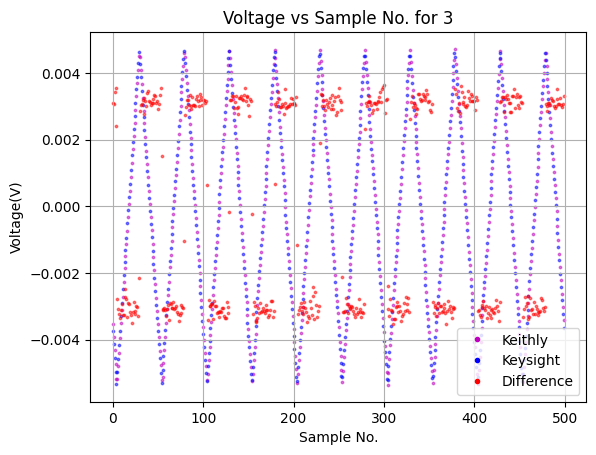

In [71]:
plt.scatter(xvals3[:range3],Keith3[:range3],s=3,c='m',alpha=0.5)
plt.scatter(xvals3[:range3],Key3[:range3],s=3,c='b',alpha=0.5)
plt.scatter(xvals3[:range3],15*(Keith3[:range3]-Key3[:range3]),s=3,c='r',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')
plt.plot([],[],'.r',label='Difference')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 3')
plt.legend()
plt.grid()

In [72]:
#Look at 4-Data

QH outputs

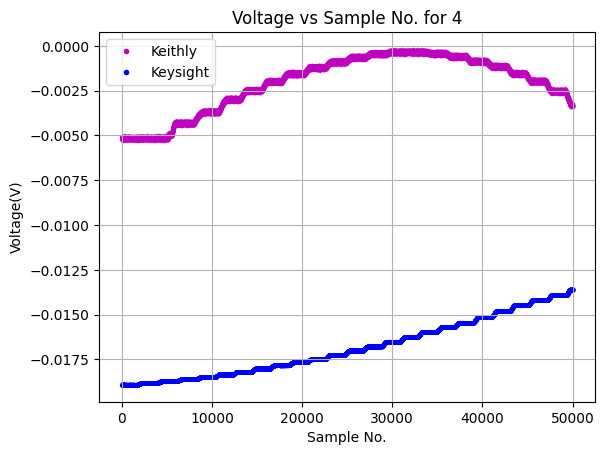

In [73]:
range4 = 50000
xvals4 = list(range(range4))

plt.scatter(xvals4,10*Keith4[:range4],s=3,c='m',alpha=0.5)
plt.scatter(xvals4,Key4[:range4],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 4')
plt.legend()
plt.grid()

In [74]:
#Look at 5-Data

Source OFF

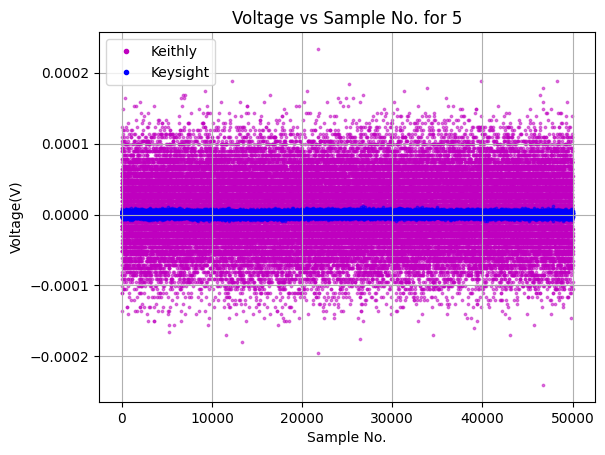

In [75]:
range5 = 50000
xvals5 = list(range(range5))

plt.scatter(xvals5,10*Keith5[:range5],s=3,c='m',alpha=0.5)
plt.scatter(xvals5,Key5[:range5],s=3,c='b',alpha=0.5)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Sample No.')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Sample No. for 5')
plt.legend()
plt.grid()

In [76]:
#MIsc Analysis for dual data

## DMM Synching, Delay Analysis

Analyzing signal 3 for delay

Frequency was 100Hz
Delay was 100μs
Sample Rate was 5kHz


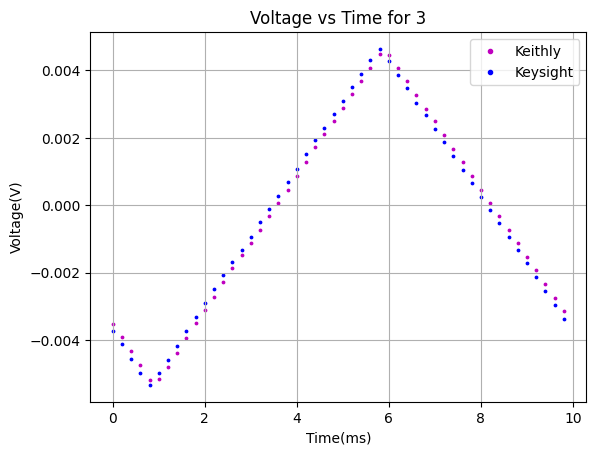

In [77]:
range3a = 50

print('Frequency was 100Hz')
print('Delay was 100μs')
print('Sample Rate was 5kHz')

plt.scatter(xvals3[:range3a]/5,Keith3[:range3a],s=3,c='m',alpha=1.0)
plt.scatter(xvals3[:range3a]/5,Key3[:range3a],s=3,c='b',alpha=1.0)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Time(ms)')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Time for 3')
plt.legend()
plt.grid()

In [78]:
#I suspect the delay has caused this

Correcting for 100us delay

Frequency was 100Hz
Delay was 100μs
Sample Rate was 5kHz


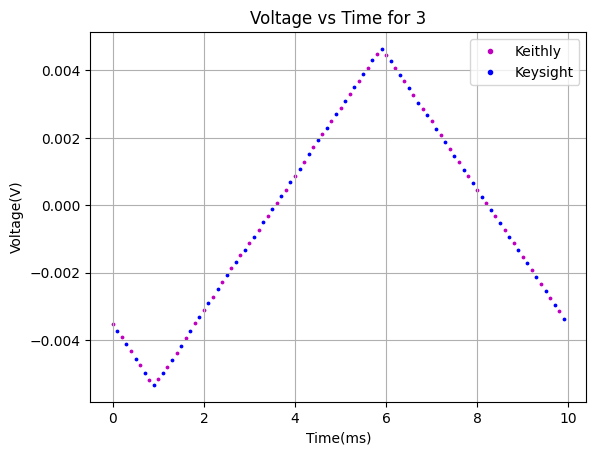

In [79]:
range3a = 50

print('Frequency was 100Hz')
print('Delay was 100μs')
print('Sample Rate was 5kHz')

plt.scatter(xvals3[:range3a]/5,Keith3[:range3a],s=3,c='m',alpha=1.0)
plt.scatter(xvals3[:range3a]/5+0.1,Key3[:range3a],s=3,c='b',alpha=1.0)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Time(ms)')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Time for 3')
plt.legend()
plt.grid()

Analyzing signal 2, correcting for delay

Frequency was 100Hz
Delay was 100μs
Sample Rate was 5kHz


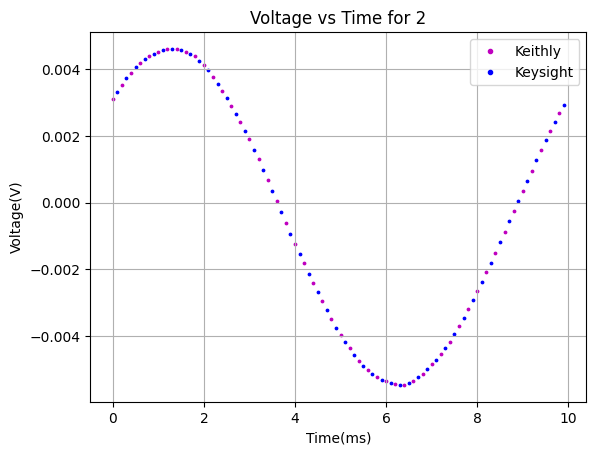

In [80]:
range2a = 50

print('Frequency was 100Hz')
print('Delay was 100μs')
print('Sample Rate was 5kHz')

plt.scatter(xvals2[:range2a]/5,Keith2[:range2a],s=3,c='m',alpha=1.0)
plt.scatter(xvals2[:range2a]/5+0.1,Key2[:range2a],s=3,c='b',alpha=1.0)
plt.plot([],[],'.m',label='Keithly')
plt.plot([],[],'.b',label='Keysight')

plt.xlabel('Time(ms)')
plt.ylabel('Voltage(V)')
plt.title('Voltage vs Time for 2')
plt.legend()
plt.grid()

In [81]:
#Try with no autorange
#Burst Mode
#Output to benchmark
#Quad Hybrid
#Measure internal resistance of detector
#VNA combo Spectrum Analyzer